# <font color = blue> IMDb Movie EDA </font>

You have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this assignment, you will try to find some interesting insights into these movies and their voters, using Python.

In [0]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and store it in a dataframe `movies`.

In [0]:
# Read the csv file using 'read_csv'. Please write your dataset location here.

movies = spark.read.csv("/FileStore/tables/IMDB_Movies.csv", header=True, inferSchema=True)


In [0]:
movies.head()

Out[3]: Row(Title='La La Land', title_year=2016, budget=30000000, Gross=151101803, actor_1_name='Ryan Gosling', actor_2_name='Emma Stone', actor_3_name='Amiée Conn', actor_1_facebook_likes=14000, actor_2_facebook_likes=19000, actor_3_facebook_likes=None, IMDb_rating=8.2, genre_1='Comedy', genre_2='Drama', genre_3='Music', MetaCritic=93, Runtime=128, CVotes10=74245, CVotes09=71191, CVotes08=64640, CVotes07=38831, CVotes06=17377, CVotes05=8044, CVotes04=3998, CVotes03=2839, CVotes02=2407, CVotes01=6802, CVotesMale=157693, CVotesFemale=56713, CVotesU18=2675, CVotesU18M=1784, CVotesU18F=868, CVotes1829=113008, CVotes1829M=78998, CVotes1829F=32730, CVotes3044=66058, CVotes3044M=50835, CVotes3044F=14165, CVotes45A=15765, CVotes45AM=12148, CVotes45AF=3302, CVotes1000=454, CVotesUS=33360, CVotesnUS=117987, VotesM=8.2, VotesF=8.1, VotesU18=8.9, VotesU18M=9.0, VotesU18F=8.7, Votes1829=8.4, Votes1829M=8.4, Votes1829F=8.2, Votes3044=7.9, Votes3044M=7.9, Votes3044F=7.8, Votes45A=7.6, Votes45AM=7.6,

- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [0]:
# Check the number of rows and columns in the dataframe
movies.count(), len(movies.columns)


Out[4]: (100, 62)

In [0]:
# Check the column-wise info of the dataframe
movies.printSchema()


root
 |-- Title: string (nullable = true)
 |-- title_year: integer (nullable = true)
 |-- budget: integer (nullable = true)
 |-- Gross: integer (nullable = true)
 |-- actor_1_name: string (nullable = true)
 |-- actor_2_name: string (nullable = true)
 |-- actor_3_name: string (nullable = true)
 |-- actor_1_facebook_likes: integer (nullable = true)
 |-- actor_2_facebook_likes: integer (nullable = true)
 |-- actor_3_facebook_likes: integer (nullable = true)
 |-- IMDb_rating: double (nullable = true)
 |-- genre_1: string (nullable = true)
 |-- genre_2: string (nullable = true)
 |-- genre_3: string (nullable = true)
 |-- MetaCritic: integer (nullable = true)
 |-- Runtime: integer (nullable = true)
 |-- CVotes10: integer (nullable = true)
 |-- CVotes09: integer (nullable = true)
 |-- CVotes08: integer (nullable = true)
 |-- CVotes07: integer (nullable = true)
 |-- CVotes06: integer (nullable = true)
 |-- CVotes05: integer (nullable = true)
 |-- CVotes04: integer (nullable = true)
 |-- CVotes

In [0]:
# Check the summary for the numeric columns 
movies.describe()


Out[6]: DataFrame[summary: string, Title: string, title_year: string, budget: string, Gross: string, actor_1_name: string, actor_2_name: string, actor_3_name: string, actor_1_facebook_likes: string, actor_2_facebook_likes: string, actor_3_facebook_likes: string, IMDb_rating: string, genre_1: string, genre_2: string, genre_3: string, MetaCritic: string, Runtime: string, CVotes10: string, CVotes09: string, CVotes08: string, CVotes07: string, CVotes06: string, CVotes05: string, CVotes04: string, CVotes03: string, CVotes02: string, CVotes01: string, CVotesMale: string, CVotesFemale: string, CVotesU18: string, CVotesU18M: string, CVotesU18F: string, CVotes1829: string, CVotes1829M: string, CVotes1829F: string, CVotes3044: string, CVotes3044M: string, CVotes3044F: string, CVotes45A: string, CVotes45AM: string, CVotes45AF: string, CVotes1000: string, CVotesUS: string, CVotesnUS: string, VotesM: string, VotesF: string, VotesU18: string, VotesU18M: string, VotesU18F: string, Votes1829: string, 

## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [0]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'

from pyspark.sql.functions import col

# Convert 'budget' and 'Gross' columns from dollars to million dollars
movies = movies.withColumn("budget", col("budget") / 1000000)
movies = movies.withColumn("Gross", col("Gross") / 1000000)

In [0]:
movies.head()

Out[8]: Row(Title='La La Land', title_year=2016, budget=30.0, Gross=151.101803, actor_1_name='Ryan Gosling', actor_2_name='Emma Stone', actor_3_name='Amiée Conn', actor_1_facebook_likes=14000, actor_2_facebook_likes=19000, actor_3_facebook_likes=None, IMDb_rating=8.2, genre_1='Comedy', genre_2='Drama', genre_3='Music', MetaCritic=93, Runtime=128, CVotes10=74245, CVotes09=71191, CVotes08=64640, CVotes07=38831, CVotes06=17377, CVotes05=8044, CVotes04=3998, CVotes03=2839, CVotes02=2407, CVotes01=6802, CVotesMale=157693, CVotesFemale=56713, CVotesU18=2675, CVotesU18M=1784, CVotesU18F=868, CVotes1829=113008, CVotes1829M=78998, CVotes1829F=32730, CVotes3044=66058, CVotes3044M=50835, CVotes3044F=14165, CVotes45A=15765, CVotes45AM=12148, CVotes45AF=3302, CVotes1000=454, CVotesUS=33360, CVotesnUS=117987, VotesM=8.2, VotesF=8.1, VotesU18=8.9, VotesU18M=9.0, VotesU18F=8.7, Votes1829=8.4, Votes1829M=8.4, Votes1829F=8.2, Votes3044=7.9, Votes3044M=7.9, Votes3044F=7.8, Votes45A=7.6, Votes45AM=7.6, Vo

-  ###  Subtask 2.2: Let's Talk Profit!

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
    5. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [0]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column

#TODO
from pyspark.sql.functions import col

movies = movies.withColumn("profit", col("Gross") - col("budget"))




In [0]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument

#TODO
movies = movies.orderBy(col("profit").desc())



In [0]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)

#TODO
top_10_profitable = movies.orderBy(col("profit").desc()).limit(10)
display(top_10_profitable)




Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12,0,8.1,Action,Adventure,Fantasy,81,136,155391,161810,166378,99402,40734,18060,8751,5970,4489,15768,425971,68664,4722,3919,768,220467,183671,34366,187138,162918,21362,42942,36441,5729,712,85141,250769,8.0,8.3,8.5,8.5,8.6,8.2,8.2,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000,19000,8.1,Action,Sci-Fi,null,69,143,260257,234203,264290,162604,67579,27957,12176,7201,4996,15528,691783,151617,4953,3767,1150,432999,343012,85465,295318,247617,43303,54282,44183,9138,842,145826,423958,8.0,8.2,8.2,8.2,8.5,8.1,8.1,8.3,8.0,8.0,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805,361,8.0,Action,Adventure,Comedy,65,108,147467,147966,170810,105717,41811,15510,7046,4273,3037,8538,391955,79804,4598,3601,969,232840,186139,44316,159222,135428,21521,28753,24218,4009,667,67933,241138,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.1,7.9,7.9,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000,523,7.6,Action,Adventure,Mystery,76,146,85219,83874,150153,121748,50575,18571,7591,4094,2675,6978,307237,115421,3650,1956,1664,218884,148652,67934,140683,109976,28735,27789,21545,5771,693,68521,221430,7.4,8.1,8.0,7.7,8.5,7.8,7.6,8.2,7.3,7.2,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000,721,8.3,Animation,Adventure,Comedy,92,103,139773,149992,158704,88289,31291,11850,4859,2932,2119,6586,389014,98386,3202,2405,776,260519,199962,58366,169886,140253,27658,32457,26171,5806,769,105490,267692,8.3,8.3,8.2,8.3,8.0,8.4,8.5,8.4,8.2,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.98449699999998
The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000,23000,8.4,Action,Thriller,null,78,164,380589,341965,281426,134959,50406,20106,9589,5713,4073,11988,842343,143070,4726,4023,672,509635,425041,79826,348324,299862,43434,55689,46968,7741,840,160533,501687,8.5,8.4,8.6,8.5,8.6,8.7,8.7,8.6,8.3,8.3,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.13064200000002
The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000,2000,7.8,Animation,Action,Adventure,83,100,41269,50795,83773,55181,21793,8596,3680,2053,1466,2918,180122,37351,1887,1464,414,111043,89180,20677,77271,65191,11020,13346,11079,2032,579,42963,114308,7.8,7.7,8.2,8.2,7.9,7.9,8.0,7.7,7.6,7.6,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197
Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000,27000,8.1,Animation,Adventure,Comedy,78,108,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.26824800000003
Despicable Me,2010,69.0,251.501645,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000,975,7.7,Animation,Adventure,Comedy,72,124,56474,66298,136943,102534,35207,11448,4000,1862,1024,1825,251408,91545,2241,1523,700,179397,122880,54800,123041,95843,25612

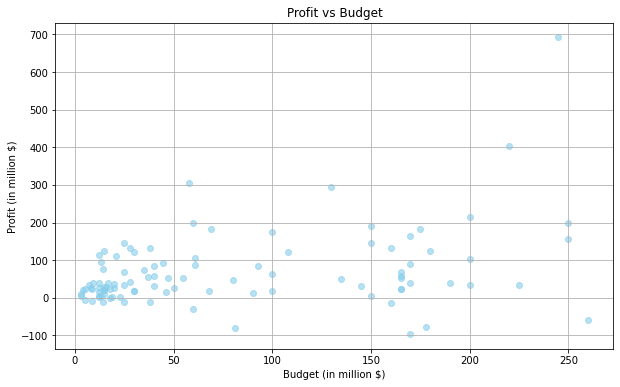

In [0]:
#Plot profit vs budget using scatterplot

# Convert to Pandas
movies_pd = movies.select("budget", "profit").dropna().toPandas()

# Plot using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(movies_pd["budget"], movies_pd["profit"], alpha=0.6, color='skyblue')
plt.xlabel("Budget (in million $)")
plt.ylabel("Profit (in million $)")
plt.title("Profit vs Budget")
plt.grid(True)
plt.show()



The dataset contains the 100 best performing movies from the year 2010 to 2016. However scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [0]:
#Find the movies with negative profit

negative_profit_movies = movies.filter(col("profit") < 0)
negative_profit_movies.select("Title", "budget", "Gross", "profit").show(truncate=False)



+---------------------------+------+----------+-------------------+
|Title                      |budget|Gross     |profit             |
+---------------------------+------+----------+-------------------+
|Tucker and Dale vs Evil    |5.0   |0.223838  |-4.776162          |
|Amour                      |8.9   |0.225377  |-8.674623          |
|Rush                       |38.0  |26.903709 |-11.096291         |
|Warrior                    |25.0  |13.651662 |-11.348338         |
|Flipped                    |14.0  |1.752214  |-12.247786         |
|X-Men: First Class         |160.0 |146.405371|-13.594628999999998|
|Scott Pilgrim vs. the World|60.0  |31.49427  |-28.50573          |
|Tangled                    |260.0 |200.807262|-59.19273799999999 |
|Edge of Tomorrow           |178.0 |100.189501|-77.810499         |
|The Little Prince          |81.2  |1.339152  |-79.860848         |
|Hugo                       |170.0 |73.820094 |-96.179906         |
+---------------------------+------+----------+-

**`Checkpoint 1:`** Can you spot the movie `Tangled` in the dataset? You may be aware of the movie 'Tangled'. Although its one of the highest grossing movies of all time, it has negative profit as per this result. If you cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), you can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

- ### Subtask 2.3: The General Audience and the Critics

You might have noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, you also have another column `IMDb_rating` which tells you the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

As a part of this subtask, you are required to find out the highest rated movies which have been liked by critics and audiences alike.
1. Firstly you will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. First convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, you need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. Refer to this link to know how abs() funtion works - https://www.geeksforgeeks.org/abs-in-python/ .
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to higher than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [0]:
# Change the scale of MetaCritic column from 100 to 10

from pyspark.sql.functions import col

movies = movies.withColumn("MetaCritic", col("MetaCritic").cast("double") / 10)




In [0]:
# Find the average ratings including MetaCritic and IMDb_rating
# Find the average ratings including MetaCritic and IMDb_rating

from pyspark.sql.functions import col, expr

movies_with_avg = movies.withColumn(
    "Avg_rating",
    expr("(IMDb_rating + (MetaCritic / 10)) / 2")
)

display(movies_with_avg.select("Title", "IMDb_rating", "MetaCritic", "avg_rating"))



Title,IMDb_rating,MetaCritic,avg_rating
Star Wars: Episode VII - The Force Awakens,8.1,8.1,4.455
The Avengers,8.1,6.9,4.395
Deadpool,8.0,6.5,4.325
The Hunger Games: Catching Fire,7.6,7.6,4.18
Toy Story 3,8.3,9.2,4.61
The Dark Knight Rises,8.4,7.8,4.59
The Lego Movie,7.8,8.3,4.3149999999999995
Zootopia,8.1,7.8,4.4399999999999995
Despicable Me,7.7,7.2,4.21
Inside Out,8.2,9.4,4.569999999999999


In [0]:
#Sort in descending order of average rating

from pyspark.sql.functions import col

# Ensure MetaCritic is scaled to 10
movies = movies.withColumn("MetaCritic", col("MetaCritic").cast("double") / 10)

# Create the Avg_rating column by averaging MetaCritic and IMDb_rating
movies = movies.withColumn("Avg_rating", (col("MetaCritic") + col("IMDb_rating")) / 2)

# Sort the movies by Avg_rating in descending order
movies_sorted_by_avg = movies.orderBy(col("Avg_rating").desc())

# Show the top results
movies_sorted_by_avg.select("Title", "IMDb_rating", "MetaCritic", "Avg_rating").show(truncate=False)


+------------------------------------------+-----------+------------------+------------------+
|Title                                     |IMDb_rating|MetaCritic        |Avg_rating        |
+------------------------------------------+-----------+------------------+------------------+
|Inception                                 |8.8        |0.74              |4.7700000000000005|
|Whiplash                                  |8.5        |0.8800000000000001|4.69              |
|Interstellar                              |8.6        |0.74              |4.67              |
|Toy Story 3                               |8.3        |0.9199999999999999|4.61              |
|Django Unchained                          |8.4        |0.8099999999999999|4.605             |
|The Dark Knight Rises                     |8.4        |0.78              |4.59              |
|Inside Out                                |8.2        |0.9400000000000001|4.569999999999999 |
|La La Land                                |8.2   

In [0]:
# Find the movies with metacritic-rating < 0.5 and also with the average rating of > 4

# Filter movies with MetaCritic < 0.5 and Avg_rating > 4
movies_filtered = movies.filter((col("MetaCritic") < 0.5) & (col("Avg_rating") > 4))

# Show the results
movies_filtered.select("Title", "MetaCritic", "Avg_rating").show(truncate=False)




+-----+----------+----------+
|Title|MetaCritic|Avg_rating|
+-----+----------+----------+
+-----+----------+----------+



**`Checkpoint 2:`** Can you spot a `Star Wars` movie in your final dataset?

- ### Subtask 2.4: Find the Most Popular Trios - I

You're a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help you out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [0]:
#checking head to see if any actor_x_facebook_likes rows have NaN values
#checking head to see if any actor_x_facebook_likes rows have NaN values
from pyspark.sql.functions import isnan, isnull

movies.select("actor_2_facebook_likes", "actor_3_facebook_likes") \
    .filter(isnull("actor_2_facebook_likes") | isnan("actor_2_facebook_likes") |
            isnull("actor_3_facebook_likes") | isnan("actor_3_facebook_likes")) \
    .show()

+----------------------+----------------------+
|actor_2_facebook_likes|actor_3_facebook_likes|
+----------------------+----------------------+
|                 19000|                  null|
|                  null|                 46000|
|                  5300|                  null|
+----------------------+----------------------+



In [0]:
# Write your code here
#cleaning actor_x_facebook_likes rows coz they have NaN values

movies = movies.fillna({
    "actor_1_facebook_likes": 0,
    "actor_2_facebook_likes": 0,
    "actor_3_facebook_likes": 0
})


In [0]:
movies.head()

Out[20]: Row(Title='Star Wars: Episode VII - The Force Awakens', title_year=2015, budget=245.0, Gross=936.662225, actor_1_name='Doug Walker', actor_2_name='Rob Walker', actor_3_name='0', actor_1_facebook_likes=131, actor_2_facebook_likes=12, actor_3_facebook_likes=0, IMDb_rating=8.1, genre_1='Action', genre_2='Adventure', genre_3='Fantasy', MetaCritic=0.8099999999999999, Runtime=136, CVotes10=155391, CVotes09=161810, CVotes08=166378, CVotes07=99402, CVotes06=40734, CVotes05=18060, CVotes04=8751, CVotes03=5970, CVotes02=4489, CVotes01=15768, CVotesMale=425971, CVotesFemale=68664, CVotesU18=4722, CVotesU18M=3919, CVotesU18F=768, CVotes1829=220467, CVotes1829M=183671, CVotes1829F=34366, CVotes3044=187138, CVotes3044M=162918, CVotes3044F=21362, CVotes45A=42942, CVotes45AM=36441, CVotes45AF=5729, CVotes1000=712, CVotesUS=85141, CVotesnUS=250769, VotesM=8.0, VotesF=8.3, VotesU18=8.5, VotesU18M=8.5, VotesU18F=8.6, Votes1829=8.2, Votes1829M=8.2, Votes1829F=8.3, Votes3044=8.0, Votes3044M=7.9, V

In [0]:
#adding a new row here to sum all the facebook likes of the trio of every movie

from pyspark.sql.functions import col

movies = movies.withColumn(
    "Total_Facebook_Likes",
    (col("actor_1_facebook_likes") + col("actor_2_facebook_likes") + col("actor_3_facebook_likes"))
)


In [0]:
#sorting by facebook_likes_combined and getting top 5 trio
top5_trios = movies.orderBy(col("Total_Facebook_Likes").desc()).select(
    "Title",
    "actor_1_name", "actor_2_name", "actor_3_name",
    "actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes",
    "Total_Facebook_Likes"
).limit(5)

top5_trios.show(truncate=False)


+--------------------------+-----------------+------------------+--------------------+----------------------+----------------------+----------------------+--------------------+
|Title                     |actor_1_name     |actor_2_name      |actor_3_name        |actor_1_facebook_likes|actor_2_facebook_likes|actor_3_facebook_likes|Total_Facebook_Likes|
+--------------------------+-----------------+------------------+--------------------+----------------------+----------------------+----------------------+--------------------+
|Lion                      |Dev Patel        |Nicole Kidman     |Rooney Mara         |33000                 |96000                 |9800                  |138800              |
|Inception                 |Leonardo DiCaprio|Tom Hardy         |Joseph Gordon-Levitt|29000                 |27000                 |23000                 |79000               |
|X-Men: Days of Future Past|Jennifer Lawrence|Peter Dinklage    |Hugh Jackman        |34000                 |22000 

- ### Subtask 2.5: Find the Most Popular Trios - II

In the previous subtask you found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition ensures that you aren't getting any unpopular actor in your trio (since the total likes calculated in the previous question doesn't tell anything about the individual popularities of each actor in the trio.).

You can do a manual inspection of the top 5 popular trios you have found in the previous subtask and check how many of those trios satisfy this condition. Also, which is the most popular trio after applying the condition above?

**Write your answers below.**

- **`No. of trios that satisfy the above condition:`** **2**

- **`Most popular trio after applying the condition:`** **Leonardo DiCaprio	Tom Hardy	Joseph Gordon-Levitt**

Even though you are finding this out by a natural inspection of the dataframe, can you also achieve this through some *if-else* statements to incorporate this. You can try this out on your own time after you are done with the assignment.

In [0]:
# No. of trios that satisfy the above condition. Display Most popular trio after applying the condition




- ### Subtask 2.6: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

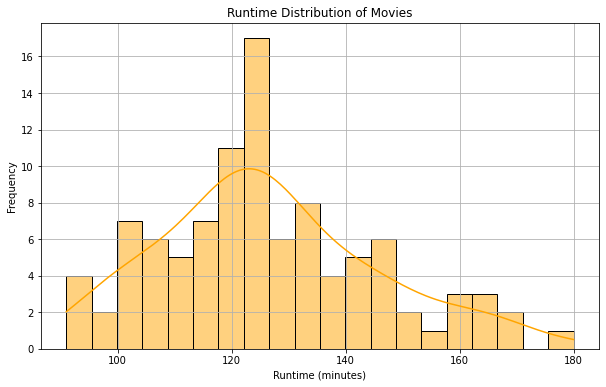

In [0]:
# Runtime histogram/density plot
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType

# Cast Runtime to integer (if not already)
movies = movies.withColumn("Runtime", col("Runtime").cast(IntegerType()))

# Convert to Pandas DataFrame
movies_pd = movies.select("Runtime").dropna().toPandas()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(movies_pd["Runtime"], kde=True, color='orange', bins=20)
plt.title("Runtime Distribution of Movies")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


**`Checkpoint 3:`** Most of the movies appear to be sharply 2 hour-long.

- ### Subtask 2.7: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [0]:
# find the top 10 movies that have the highest number of votes i.e.CVotesU18

from pyspark.sql.functions import col

# Ensure CVotesU18 is numeric
movies = movies.withColumn("CVotesU18", col("CVotesU18").cast("int"))

# Sort by CVotesU18 and get top 10
top10_u18_votes = movies.orderBy(col("CVotesU18").desc()).select("Title", "CVotesU18").limit(10)

# Show the results
top10_u18_votes.show(truncate=False)





+------------------------------------------+---------+
|Title                                     |CVotesU18|
+------------------------------------------+---------+
|Interstellar                              |5735     |
|Inception                                 |5678     |
|Guardians of the Galaxy                   |5154     |
|The Avengers                              |4953     |
|The Dark Knight Rises                     |4726     |
|Star Wars: Episode VII - The Force Awakens|4722     |
|Deadpool                                  |4598     |
|Captain America: The Winter Soldier       |3765     |
|The Hunger Games: Catching Fire           |3650     |
|The Wolf of Wall Street                   |3622     |
+------------------------------------------+---------+



**`Checkpoint 4:`** Are these kids watching `Deadpool` a lot?  **Yes**

## Task 3 : Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Subtask 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, you need to aggregate a few values over these 3 columns. 
1. First create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one. You will realise the use of this column by the end of this subtask.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.There is a function called `add()` in pandas which lets you do this. You can refer to this link to see how this function works. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [0]:
# Create the dataframe df_by_genre

# Define the desired columns by name
selected_columns = [
    "genre_1", "genre_2", "genre_3",  # columns 11-13
    "CVotes10", "CVotes09", "CVotes08", "CVotes07", "CVotes06", "CVotes05", "CVotes04", "CVotes03",
    "CVotes02", "CVotes01", "CVotesMale", "CVotesFemale", "CVotesU18", "CVotesU18M", "CVotesU18F",
    "CVotes1829", "CVotes1829M", "CVotes1829F", "CVotes3044", "CVotes3044M", "CVotes3044F",
    "CVotes45A", "CVotes45AM", "CVotes45AF", "CVotes1000", "CVotesUS", "CVotesnUS",
    "VotesM", "VotesF", "VotesU18", "VotesU18M", "VotesU18F", "Votes1829", "Votes1829M",
    "Votes1829F", "Votes3044", "Votes3044M", "Votes3044F", "Votes45A", "Votes45AM", "Votes45AF",
    "Votes1000", "VotesUS", "VotesnUS"
]

# Create the new DataFrame
df_by_genre = movies.select(*selected_columns)

# Show a preview
df_by_genre.show(5, truncate=False)



+---------+---------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+----------+------------+---------+----------+----------+----------+-----------+-----------+----------+-----------+-----------+---------+----------+----------+----------+--------+---------+------+------+--------+---------+---------+---------+----------+----------+---------+----------+----------+--------+---------+---------+---------+-------+--------+
|genre_1  |genre_2  |genre_3|CVotes10|CVotes09|CVotes08|CVotes07|CVotes06|CVotes05|CVotes04|CVotes03|CVotes02|CVotes01|CVotesMale|CVotesFemale|CVotesU18|CVotesU18M|CVotesU18F|CVotes1829|CVotes1829M|CVotes1829F|CVotes3044|CVotes3044M|CVotes3044F|CVotes45A|CVotes45AM|CVotes45AF|CVotes1000|CVotesUS|CVotesnUS|VotesM|VotesF|VotesU18|VotesU18M|VotesU18F|Votes1829|Votes1829M|Votes1829F|Votes3044|Votes3044M|Votes3044F|Votes45A|Votes45AM|Votes45AF|Votes1000|VotesUS|VotesnUS|
+---------+---------+-------+--------+--------+--------+--

In [0]:
# Create a column cnt and initialize it to 1

from pyspark.sql.functions import lit

df_by_genre = df_by_genre.withColumn("cnt", lit(1))

# Show a few rows to verify
df_by_genre.show(5, truncate=False)



+---------+---------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+----------+------------+---------+----------+----------+----------+-----------+-----------+----------+-----------+-----------+---------+----------+----------+----------+--------+---------+------+------+--------+---------+---------+---------+----------+----------+---------+----------+----------+--------+---------+---------+---------+-------+--------+---+
|genre_1  |genre_2  |genre_3|CVotes10|CVotes09|CVotes08|CVotes07|CVotes06|CVotes05|CVotes04|CVotes03|CVotes02|CVotes01|CVotesMale|CVotesFemale|CVotesU18|CVotesU18M|CVotesU18F|CVotes1829|CVotes1829M|CVotes1829F|CVotes3044|CVotes3044M|CVotes3044F|CVotes45A|CVotes45AM|CVotes45AF|CVotes1000|CVotesUS|CVotesnUS|VotesM|VotesF|VotesU18|VotesU18M|VotesU18F|Votes1829|Votes1829M|Votes1829F|Votes3044|Votes3044M|Votes3044F|Votes45A|Votes45AM|Votes45AF|Votes1000|VotesUS|VotesnUS|cnt|
+---------+---------+-------+--------+--------+---

In [0]:
# Group the movies by individual genres

# Step 1: Create separate DataFrames
genre1 = df_by_genre.select(col("genre_1").alias("Genre"), "cnt")
genre2 = df_by_genre.select(col("genre_2").alias("Genre"), "cnt")
genre3 = df_by_genre.select(col("genre_3").alias("Genre"), "cnt")

# Step 2: Union all genres
all_genres = genre1.union(genre2).union(genre3)

# Step 3: Group by Genre and sum counts
genre_grouped = all_genres.groupBy("Genre").sum("cnt").withColumnRenamed("sum(cnt)", "Movie_Count")

# Step 4: Filter out null genres (in case there are missing genre_2 or genre_3)
genre_grouped = genre_grouped.filter(col("Genre").isNotNull())

# Step 5: Show the grouped genres
genre_grouped.orderBy(col("Movie_Count").desc()).show(truncate=False)


+---------+-----------+
|Genre    |Movie_Count|
+---------+-----------+
|Drama    |65         |
|Adventure|38         |
|Action   |31         |
|Comedy   |23         |
|Biography|18         |
|Sci-Fi   |17         |
|Romance  |13         |
|Thriller |13         |
|Crime    |11         |
|Animation|11         |
|Mystery  |7          |
|Fantasy  |7          |
|History  |4          |
|Sport    |3          |
|War      |2          |
|Family   |2          |
|Music    |2          |
|Western  |2          |
|Musical  |1          |
|Horror   |1          |
+---------+-----------+



In [0]:
# Add the grouped data frames and store it in a new data frame

from pyspark.sql.functions import col

# Select genre and cnt from each
genre1 = df_by_genre.select(col("genre_1").alias("Genre"), "cnt")
genre2 = df_by_genre.select(col("genre_2").alias("Genre"), "cnt")
genre3 = df_by_genre.select(col("genre_3").alias("Genre"), "cnt")

# Union all genres together
all_genres = genre1.union(genre2).union(genre3)

# Group by Genre and sum cnt
final_genre_df = all_genres.groupBy("Genre").sum("cnt").withColumnRenamed("sum(cnt)", "Movie_Count")

# Filter out null genres
final_genre_df = final_genre_df.filter(col("Genre").isNotNull())

# View the result
final_genre_df.orderBy(col("Movie_Count").desc()).show(truncate=False)



+---------+-----------+
|Genre    |Movie_Count|
+---------+-----------+
|Drama    |65         |
|Adventure|38         |
|Action   |31         |
|Comedy   |23         |
|Biography|18         |
|Sci-Fi   |17         |
|Romance  |13         |
|Thriller |13         |
|Crime    |11         |
|Animation|11         |
|Mystery  |7          |
|Fantasy  |7          |
|History  |4          |
|Sport    |3          |
|War      |2          |
|Family   |2          |
|Music    |2          |
|Western  |2          |
|Musical  |1          |
|Horror   |1          |
+---------+-----------+



In [0]:
# Get and display genres with atleast 10 occurences

# Filter genres with at least 10 occurrences
popular_genres = final_genre_df.filter(col("Movie_Count") >= 10)

# Show the result
popular_genres.orderBy(col("Movie_Count").desc()).show(truncate=False)




+---------+-----------+
|Genre    |Movie_Count|
+---------+-----------+
|Drama    |65         |
|Adventure|38         |
|Action   |31         |
|Comedy   |23         |
|Biography|18         |
|Sci-Fi   |17         |
|Romance  |13         |
|Thriller |13         |
|Crime    |11         |
|Animation|11         |
+---------+-----------+



In [0]:
from pyspark.sql.functions import sum as _sum

# 1. List of columns you want to average
columns_to_average = [
    "CVotes10", "CVotes09", "CVotes08", "CVotes07", "CVotes06", "CVotes05", "CVotes04", "CVotes03",
    "CVotes02", "CVotes01", "CVotesMale", "CVotesFemale", "CVotesU18", "CVotesU18M", "CVotesU18F",
    "CVotes1829", "CVotes1829M", "CVotes1829F", "CVotes3044", "CVotes3044M", "CVotes3044F",
    "CVotes45A", "CVotes45AM", "CVotes45AF", "CVotes1000", "CVotesUS", "CVotesnUS",
    "VotesM", "VotesF", "VotesU18", "VotesU18M", "VotesU18F", "Votes1829", "Votes1829M",
    "Votes1829F", "Votes3044", "Votes3044M", "Votes3044F", "Votes45A", "Votes45AM", "Votes45AF",
    "Votes1000", "VotesUS", "VotesnUS"
]

# 2. Build aggregation expressions separately
agg_exprs = []
for col_name in columns_to_average:
    agg_exprs.append(_sum(col_name).alias(col_name))
agg_exprs.append(_sum("cnt").alias("Movie_Count"))

# 3. Group by 'genre_1' and apply aggregation
grouped = df_by_genre.groupBy("genre_1").agg(*agg_exprs)

# 4. Now divide each voting column by Movie_Count to get mean
for col_name in columns_to_average:
    grouped = grouped.withColumn(col_name, col(col_name) / col("Movie_Count"))

# 5. Rename 'genre_1' to 'Genre'
grouped = grouped.withColumnRenamed("genre_1", "Genre")

# 6. (Optional) Filter genres with at least 10 movies
grouped = grouped.filter(col("Movie_Count") >= 10)

# 7. Show the results
grouped.orderBy(col("Movie_Count").desc()).show(truncate=False)


+---------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+-----------------+-----------+
|Genre    |CVotes10          |CVotes09          |CVotes08          |CVotes07          |CVotes06          |CVotes05          |CVotes04          |CVotes03 

In [0]:
genre_top10

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-34106903549518>:1
----> 1 genre_top10

NameError: name 'genre_top10' is not defined

In [0]:
# Rounding off the columns of Votes to two decimals

genre_top10.iloc[:,27:44] = round(genre_top10.iloc[:,27:44],2)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-34106903549519>:3
      1 # Rounding off the columns of Votes to two decimals
----> 3 genre_top10.iloc[:,27:44] = round(genre_top10.iloc[:,27:44],2)

NameError: name 'genre_top10' is not defined

In [0]:
# Converting CVotes to int type

genre_top10.iloc[:,0:27] = genre_top10.iloc[:,0:27].astype(int)


If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###  Subtask 3.2: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

In [0]:
# Countplot for genres

genre_top10.cnt.plot.bar()


**`Checkpoint 5:`** Is the bar for `Drama` the tallest? **Yes**

In [0]:
# find the most popular genre



-  ###  Subtask 3.3: Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. Make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group. 

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group. 

3. Make sure that you plot these heatmaps side by side using `subplots` so that you can easily compare the two genders and derive insights.

4. Write your any three inferences from this plot. You can make use of the previous bar plot also here for better insights.
Refer to this link- https://seaborn.pydata.org/generated/seaborn.heatmap.html. You might have to plot something similar to the fifth chart in this page (You have to plot two such heatmaps side by side).

5. Repeat subtasks 1 to 4, but now instead of taking the CVotes-related columns, you need to do the same process for the Votes-related columns. These heatmaps will show you how the two genders have rated movies across various genres.

You might need the below link for formatting your heatmap.
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

-  Note : Use `genre_top10` dataframe for this subtask

In [0]:
# 1st set of heat maps for CVotes-related columns

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
heatmap_m = sns.heatmap(genre_top10.iloc[:,13:23:3],annot=True,cmap="Spectral_r")
bottom, top = heatmap_m.get_ylim()
heatmap_m.set_ylim(bottom + 0.5, top - 0.5)
plt.subplot(1,2,2)
heatmap_f = sns.heatmap(genre_top10.iloc[:,14:24:3],annot=True,cmap="Spectral_r")
bottom, top = heatmap_f.get_ylim()
heatmap_f.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- **Inference 1**: Sci-Fi also appears to be the most popular category among males and females of age 30-44 and above 45 as well (also applies for males and females of age under 18)

- **Inference 2**: Thriller and action seem to the second and adventure seems to be the third favourtie category among males of age 18-29 (animation seems to be the least favourite) whereas adventure seems to be the second and animation seems to be the thrid favourite category among females of age 18-29 (crime seems to be the least favourite). This implies that males of age 18-29 would rather watch any other genre of movie than animation whereas the females of age 18-29 would rather watch any other genre of movie than crime 

- **Inference 3**: Males of age under 18 like romantic movies the least whereas thats not the case with females under 18, who like crime movies the least.

- **Inference 4**: Crime movies are generally the least favourite among females of all ages except when they turn above 45. They somehow like crime movies more than animated movies which used to be their favourite in their younger days. 

In [0]:
# 2nd set of heat maps for Votes-related columns

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
heatmap_m = sns.heatmap(genre_top10.iloc[:,30:40:3],annot=True,cmap="Spectral_r")
bottom, top = heatmap_m.get_ylim()
heatmap_m.set_ylim(bottom + 0.5, top - 0.5)
plt.subplot(1,2,2)
heatmap_f = sns.heatmap(genre_top10.iloc[:,31:41:3],annot=True,cmap="Spectral_r")
bottom, top = heatmap_f.get_ylim()
heatmap_f.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- **Inference 1**:Sci-Fi appears to be the highest rated genre in males of all age groups whereas for females, after being 18+, the highest rated genre becomes animation for all other age groups.

- **Inference 2**: For males, animated movies are the least rated for age group under 18 whereas romantic movies become the least rated for all other age groups. For females, crime movies remain the least rated for all age groups except 45+ where that place is shockingly taken by romantic movies

- **Inference 3**:In general, people, irrespective of age and gender like movies more when they are younger and that liking and the tendency to give higher rating decreases over time, thereby decreasing the average rating of age groups if we go from under 18 to 45+

-  ###  Subtask 3.4: US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

1. Create a column `IFUS` in the dataframe `movies`. The column `IFUS` should contain the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` should contain the value `non-USA`.


2. Now make a boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies. Make use of the column `IFUS` to make this plot. Similarly, make another subplot that shows how non US voters have voted for the US and non-US movies by plotting `CVotesnUS` for both the US and non-US movies. Write any of your two inferences/observations from these plots.


3. Again do a similar analysis but with the ratings. Make a boxplot that shows how the ratings from the US people i.e. `VotesUS` is varying for the US and non-US movies. Similarly, make another subplot that shows how `VotesnUS` is varying for the US and non-US movies. Write any of your two inferences/observations from these plots.

Note : Use `movies` dataframe for this subtask. Make use of this documention to format your boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [0]:
# Creating IFUS column
#initializing all columns with USA

movies["IFUS"] = "USA" 

#changing all values where country != USA
movies.loc[movies["Country"] != "USA","IFUS"] = "non-USA" 
movies


In [0]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(x=movies["IFUS"],y=movies["CVotesUS"])
plt.subplot(1,2,2)
sns.boxplot(x=movies["IFUS"],y=movies["CVotesnUS"])
plt.show()

**`Inferences:`** Write your two inferences/observations below:
- Inference 1: From both plots, we can see that non-USA plot's IQR is slightly larger thant USA people plot
- Inference 2: From both plots, there seem to be some outliers in USA plot, suggesting that some USA movies got exceptionally high votes from USA and non-USA people

In [0]:
# Box plot - 2: VotesUS(y) vs IFUS(x)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(x=movies["IFUS"],y=movies["VotesUS"])
plt.subplot(1,2,2)
sns.boxplot(x=movies["IFUS"],y=movies["VotesnUS"])
plt.show()


**`Inferences:`** Write your two inferences/observations below:
- Inference 1: From both plots, we can see that there are some USA movies that have got exceptionally high rating from USA and non-USA people (outliers in USA plot)
- Inference 2: From both plots, USA people have roughly given ratings to non-USA movies in range (7.8-8) and USA movies in range (7.8-8.1) whereas non-USA people have roughly given ratings to non-USA movies in range(7.6-8) and USA movies in range(7.6-7.9). There seems to be trend here that states that USA people will rate USA movies higher and non-USA people will rate non-USA movies higher

-  ###  Subtask 3.5:  Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres. 

1. Sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

2. Make a seaborn barplot for `genre` vs `CVotes1000`.

3. Write your inferences. You can also try to relate it with the heatmaps you did in the previous subtasks.




In [0]:
genre_top10

In [0]:
# Sorting by CVotes1000
genre_top10.sort_values(by='CVotes1000',ascending=False)


In [0]:
# Bar plot

plt.figure(figsize=(10,5))
sns.barplot(x=genre_top10.index,y=genre_top10["CVotes1000"])

**`Inferences:`** Write your inferences/observations here.
- 1 Sci-Fi still seems to be the highest voted category here as well, as was the case in case of heatmaps
- 2 Same trends seen in the heatmaps are seen here with regards to adventure, action and thriller as them being the next voted genres

**`Checkpoint 6:`** The genre `Romance` seems to be most unpopular among the top 1000 voters.

With the above subtask, your assignment is over. In your free time, do explore the dataset further on your own and see what kind of other insights you can get across various other columns.

## Now complete following scenarios

In [0]:
# Scenario 1: Top 10 movies by IMDb rating

TODO


In [0]:
# Scenario 2: Movies released after 2010 with rating above 8

TODO


In [0]:
# Scenario 3: Average rating by genre (splitting genres into individual entries)

TODO


In [0]:
# Scenario 4: Number of movies released each year

TODO


In [0]:
# Scenario 5: Top 5 directors with highest average IMDb rating (minimum 5 movies)

TODO


In [0]:
# Scenario 6: Movies grouped by content rating and their average durations

TODO


In [0]:
# Scenario 7: Year with the most movie releases

TODO


In [0]:
# Scenario 8: Longest movie per genre

TODO


In [0]:
# Scenario 9: Movies with budget greater than revenue (loss-making)

TODO


In [0]:
# Scenario 10: Most common actor/actress (based on appearances in actor_1_name, actor_2_name, actor_3_name)

TODO
